In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n=15
x=np.linspace(-1,1,n).reshape(n,1)

In [9]:
L=np.eye(n)
L[np.arange(1,n-1),np.arange(1,n-1)]=2
L[np.arange(1,n),np.arange(0,n-1)]=-1
L[np.arange(0,n-1),np.arange(1,n)]=-1

In [5]:
Phi1=np.zeros((n,1))
Phi1[0]=-1
Phi1[-1]=1

In [6]:
Phi2=np.zeros(L.shape)
Phi2[0,0]=Phi2[-1,-1]=2

## Second-order Optimization (Eq. 12)

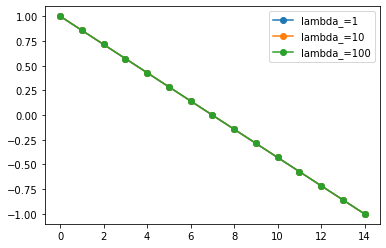

In [7]:
for lambda_ in [1,10,100]:
    delta_x=np.linalg.solve(Phi2+lambda_*L, Phi1+lambda_*L@x)
    plt.plot(delta_x/delta_x[0],'-o',label=f'{lambda_=}')
plt.legend()

## Modified Gradient Descent (Eq. 14)

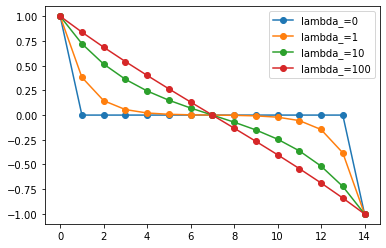

In [8]:
for lambda_ in [0,1,10,100]:
    delta_x=np.linalg.solve(np.eye(n,n)+lambda_*L, Phi1)
    plt.plot(delta_x/delta_x[0],'-o',label=f'{lambda_=}')
plt.legend()